In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy.signal as sci

In [ ]:
ID = 1
fs = 1000

mvk = np.loadtxt('MVK_ID' + str(ID) + '.txt').T
mvk_t = np.arange(0, mvk.shape[1]/fs, 1/fs)

eks1 = np.loadtxt('eksperiment1_ID' + str(ID) + '.txt').T
eks1_t = np.arange(0, eks1.shape[1]/fs, 1/fs)

eks2 = np.loadtxt('eksperiment2_ID' + str(ID) + '.txt').T
eks2_t = np.arange(0, eks2.shape[1]/fs, 1/fs)

In [ ]:
def plot_signal(t, signal, lim):
    plt.subplot(121)
    plt.plot(t, signal[0, :])
    plt.title('Biceps')
    plt.ylim(lim)
    plt.subplot(122)
    plt.plot(t, signal[1, :])
    plt.title('Triceps')
    plt.ylim(lim)

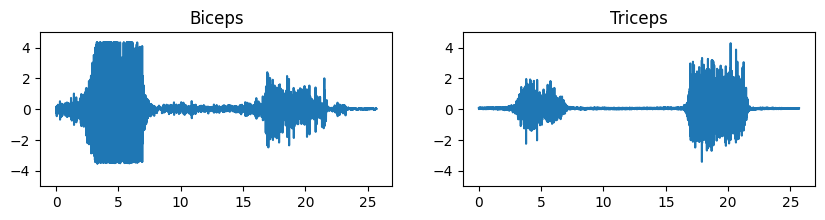

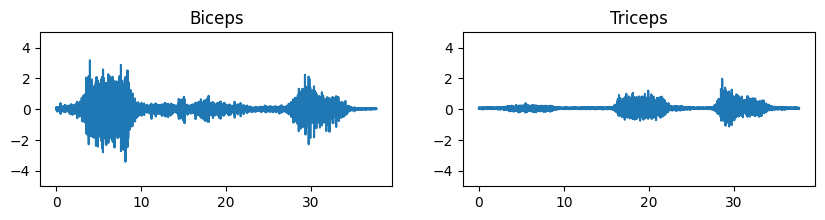

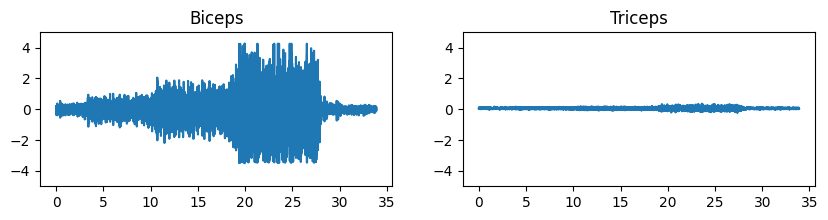

In [ ]:
plt.figure(figsize=(10, 2))
plot_signal(mvk_t, mvk, [-5, 5])
plt.figure(figsize=(10, 2))
plot_signal(eks1_t, eks1, [-5, 5])
plt.figure(figsize=(10, 2))
plot_signal(eks2_t, eks2, [-5, 5])

In [ ]:
import scipy.signal as s
def filter_signal(signal, fd, fg, f0, fs):

    Wn = [fd,fg]
    N = 4
    b1, a1 = s.butter(N, Wn, 'pass', fs)
    Q = 25
    b2, a2 = s.iirnotch(f0,Q,fs)
    signal_filt = s.filtfilt(b1, a1, signal)
    signal_filt = s.filtfilt(b2, a2, signal)
    return signal_filt

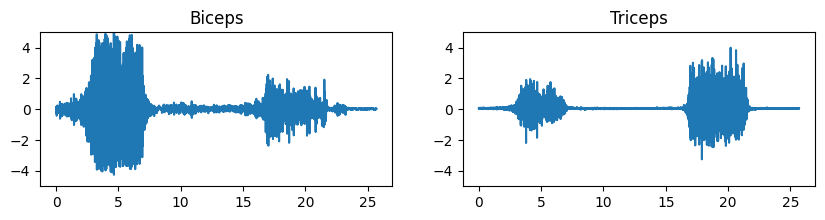

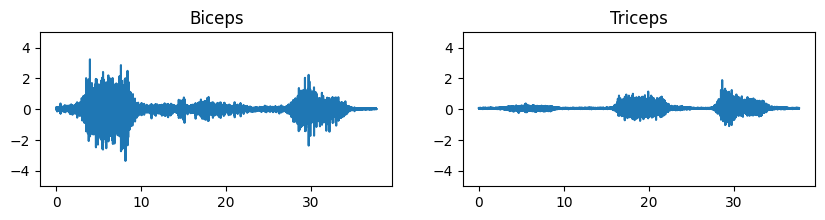

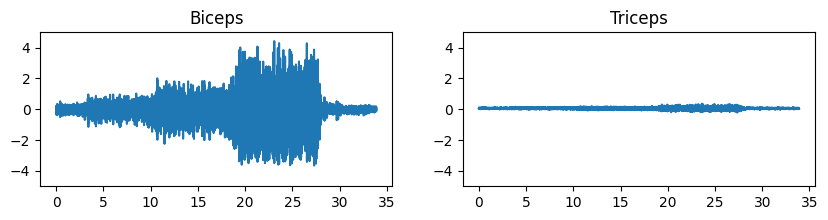

In [ ]:
fd = 5
fg = 10
f0 = 50

mvk_filt = filter_signal(mvk, fd, fg, f0, fs)
eks1_filt = filter_signal(eks1, fd, fg, f0, fs)
eks2_filt = filter_signal(eks2, fd, fg, f0, fs)

plt.figure(figsize=(10, 2))
plot_signal(mvk_t, mvk_filt, [-5, 5])
plt.figure(figsize=(10, 2))
plot_signal(eks1_t, eks1_filt, [-5, 5])
plt.figure(figsize=(10, 2))
plot_signal(eks2_t, eks2_filt, [-5, 5])

In [ ]:
def signal_rectifaction(signal):
    signal = np.abs(signal)
    return signal

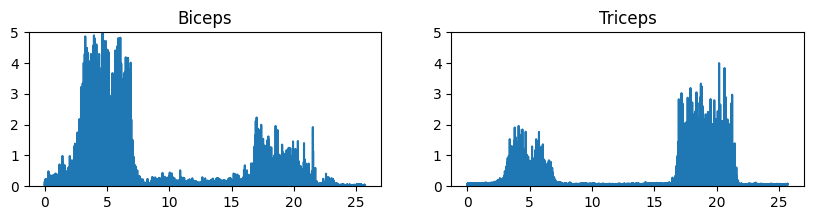

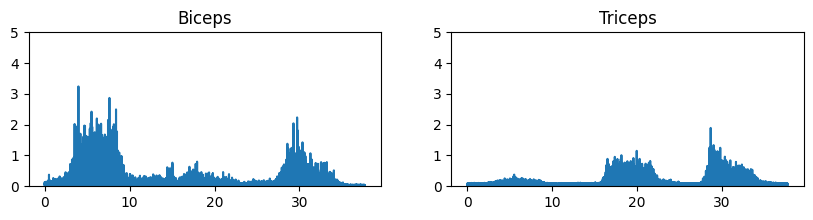

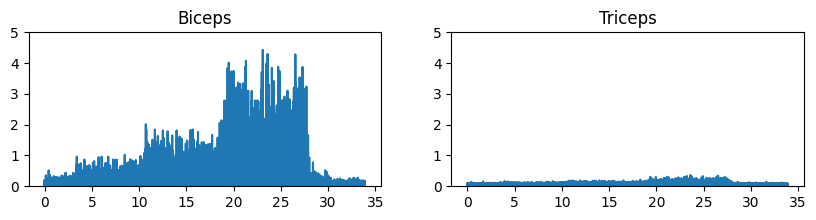

In [ ]:
mvk_isp = signal_rectifaction(mvk_filt)
eks1_isp = signal_rectifaction(eks1_filt)
eks2_isp = signal_rectifaction(eks2_filt)

plt.figure(figsize=(10, 2))
plot_signal(mvk_t, mvk_filt, [0, 5])
plt.figure(figsize=(10, 2))
plot_signal(eks1_t, eks1_filt, [0, 5])
plt.figure(figsize=(10, 2))
plot_signal(eks2_t, eks2_filt, [0, 5])

In [ ]:
def signal_smoothing(signal, fc, fs):
    N = 4
    b1, a1 = s.butter(N, fc, btype = 'low', fs = fs)
    signal_filt = s.filtfilt(b1, a1, signal)
    return signal_filt

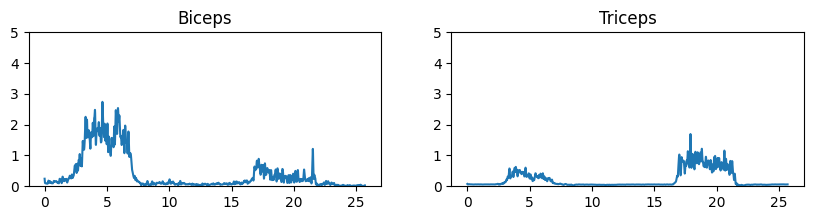

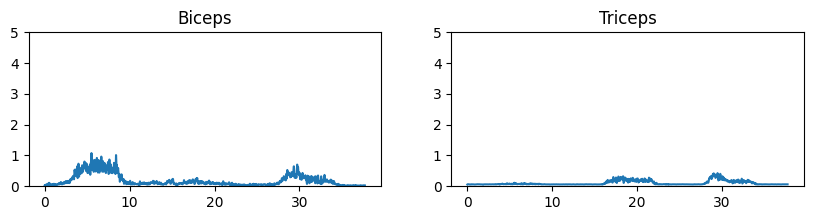

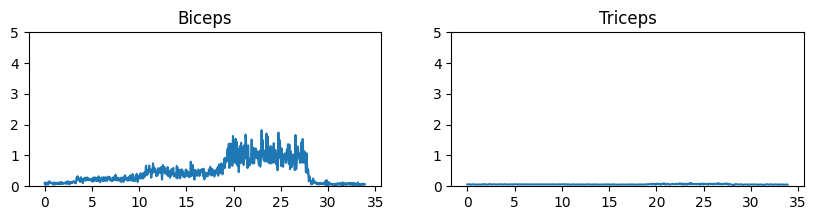

In [ ]:
fc = 10

mvk_gl = signal_smoothing(mvk_isp, fc, fs)
eks1_gl = signal_smoothing(eks1_isp, fc, fs)
eks2_gl = signal_smoothing(eks2_isp, fc, fs)

plt.figure(figsize=(10, 2))
plot_signal(mvk_t, mvk_gl, [0, 5])
plt.figure(figsize=(10, 2))
plot_signal(eks1_t, eks1_gl, [0, 5])
plt.figure(figsize=(10, 2))
plot_signal(eks2_t, eks2_gl, [0, 5])

In [ ]:
def rms(signal, winsize):
    signalb = signal[0, :]
    signalt = signal[1, :]
    N = len(signalb)
    envelope = np.zeros((2,N))
    i = winsize
    while i < N:
        windowb = signalb[(i - winsize):i]
        resb = np.sqrt(np.mean(windowb ** 2))
        envelope[0][i] = resb
        windowt = signalt[(i - winsize):i]
        rest = np.sqrt(np.mean(windowt ** 2))
        envelope[1][i] = rest
        i += 1
    return envelope

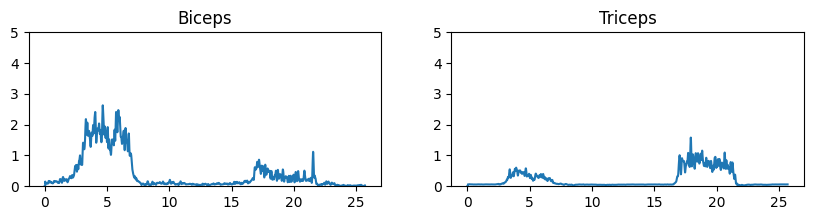

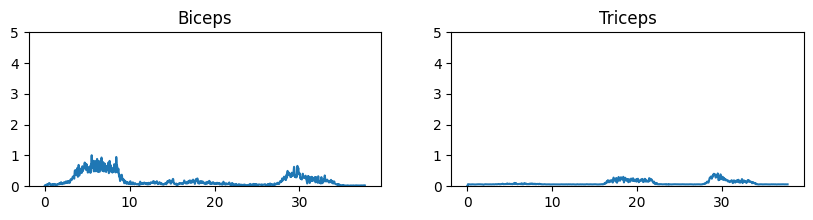

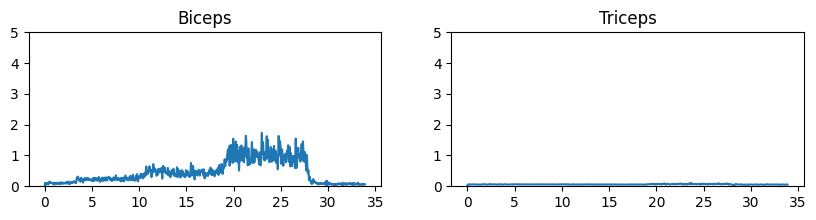

In [ ]:
winsize = 50

mvk_rms = rms(mvk_gl, winsize)
eks1_rms = rms(eks1_gl, winsize)
eks2_rms = rms(eks2_gl, winsize)


plt.figure(figsize=(10, 2))
plot_signal(mvk_t, mvk_rms, [0, 5])
plt.figure(figsize=(10, 2))
plot_signal(eks1_t, eks1_rms, [0, 5])
plt.figure(figsize=(10, 2))
plot_signal(eks2_t, eks2_rms, [0, 5])

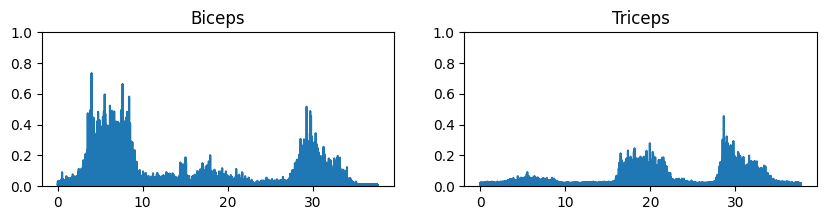

In [ ]:
mvk_norm = np.max(mvk)
eks1_norm = eks1/mvk_norm

plt.figure(figsize=(10, 2))
plot_signal(eks1_t, eks1_norm, [0, 1])

In [ ]:

x_rest = eks1_norm[:, 22*fs:28*fs]

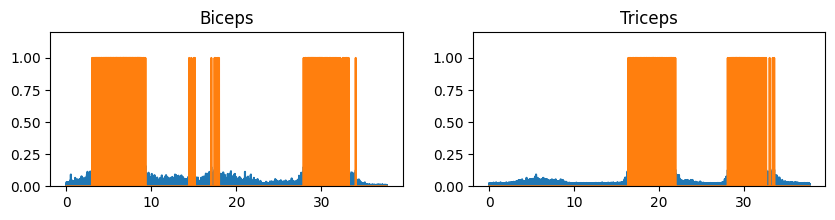

In [ ]:
eks1_bin_st = np.zeros(eks1_norm.shape)

alpha = 10
thr = alpha * np.median(x_rest)
N = len(eks1_norm[0])
i = 0
while i<N:
  if(eks1_norm[0][i]>thr):
    eks1_bin_st[0][i] = 1
  if(eks1_norm[1][i]>thr):
    eks1_bin_st[1][i] = 1
  i = i+1


plt.figure(figsize=(10, 2))
plot_signal(eks1_t, eks1_norm, [0, 1.2])
plot_signal(eks1_t, eks1_bin_st, [0, 1.2])

In [ ]:
def dt_binarisation(signal, thr1, thr2):
    N = len(signal[0])
    signalDt = np.zeros((2,N))
    i = 0
    while i<N:
      if  signal[0][i] > thr2:
        signalDt[0][i] = 1
      if  signal[1][i] > thr2:
        signalDt[1][i] = 1
      if signalDt[0][i-1] == 1 and signal[0][i] < thr1:
        signalDt[0][i] = 0
      if signalDt[1][i-1] == 1 and signal[1][i] < thr1:
        signalDt[1][i] = 0
      i = i + 1

    return signalDt

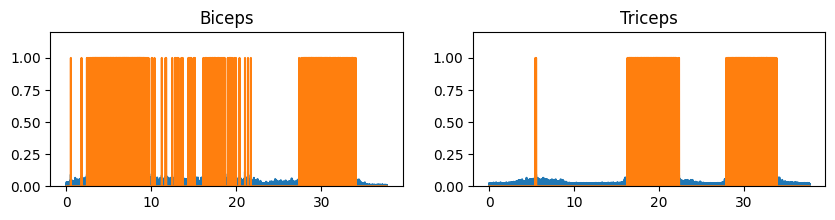

In [ ]:
eks1_bin_dt = np.zeros(eks1_norm.shape)

alpha1 = 1
thr1 = alpha1 * np.median(x_rest)

alpha2 = 6
thr2 = alpha2 * np.median(x_rest)

eks1_bin_dt = dt_binarisation(eks1_norm, thr1, thr2)

plt.figure(figsize=(10, 2))
plot_signal(eks1_t, eks1_norm, [0, 1.2])
plot_signal(eks1_t, eks1_bin_dt, [0, 1.2])

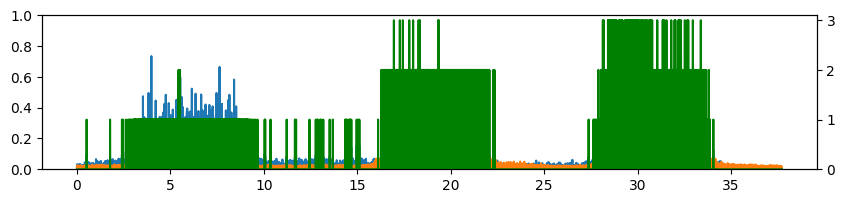

In [ ]:
arm_activation = np.zeros(eks1_norm.shape[1])
N = len(eks1_norm[0])
i = 0
while i < N:
  if eks1_bin_dt[0][i] == 0 and eks1_bin_dt[1][i] == 0:
    arm_activation[i] = 0
  if eks1_bin_dt[0][i] == 1 and eks1_bin_dt[1][i] == 0:
    arm_activation[i] = 1
  if eks1_bin_dt[0][i] == 0 and eks1_bin_dt[1][i] == 1:
    arm_activation[i] = 2
  if eks1_bin_dt[0][i] == 1 and eks1_bin_dt[1][i] == 1:
    arm_activation[i] = 3
  i = i + 1

fig, ax1 = plt.subplots(figsize=(10, 2))
ax2 = ax1.twinx()
ax1.plot(eks1_t, eks1_norm[0, :])
ax1.plot(eks1_t, eks1_norm[1, :])
ax1.set_ylim(0, 1)
ax2.plot(eks1_t, arm_activation, 'g')
ax2.set_ylim(0, 3.1)
plt.show()

In [ ]:
eks2_biceps = signal_rectifaction(eks2[0, :])

In [ ]:
def MDF(signal, N):
    x = np.fft.fft(signal,N)
    fosa = np.fft.fftfreq(N, 1/fs)
    x1 = x[0 : int(len(fosa)/2)]
    absx1 = np.abs(x1)
    px1 = absx1**2
    MDF = np.median(px1)

    return MDF

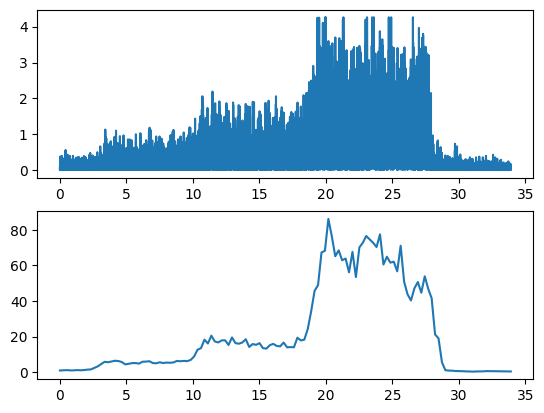

In [ ]:
winsize = 1000
winstep = 250
N = 2**int(np.ceil(np.log2(winsize)))

eks2_mdf = []
i = 0
while i + winsize <= len(eks2[0]):
    window = eks2[0 ,i:i + winsize]

    mdf = MDF(window, N)
    eks2_mdf.append(mdf)

    i += winstep


mdf_t = np.linspace(0, np.max(eks2_t), len(eks2_mdf))


plt.figure()
plt.subplot(211)
plt.plot(eks2_t, eks2_biceps)
plt.subplot(212)
plt.plot(mdf_t, eks2_mdf)
plt.show()